# AUSTIN WASTE ANALYSIS

Nama  : Fachmi Maris
Batch : 002

## Memilih Data dari BigQuery

SELECT report_date, load_time, load_type, load_weight, dropoff_site  FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE report_date > "2020-12-31" AND report_date< "2021-07-09"
ORDER BY report_date ASC;

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime

In [140]:
df=pd.read_csv("D:\GC2\h8dsft_P0GC2_Fachmi_Maris.csv.csv")
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


In [141]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


In [143]:
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

# Problem 1 (Stats)

## 1. Melakukan pembersihan data dan mengatasi Missing Values

In [144]:
#Mengatasi Missing Values
df=df.dropna()

In [145]:
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

In [146]:
df["report_date"] = pd.to_datetime(df["report_date"], format='%Y-%m-%d')

## 2. Melakukan eksplorasi data sederhana

In [147]:
df=df.sort_values('report_date')
df

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
108,2021-01-02,2021-01-02 11:46:00 UTC,ORGANICS,13560.0,ORGANICS BY GOSH
109,2021-01-02,2021-01-02 02:51:00 UTC,ORGANICS,9360.0,ORGANICS BY GOSH
110,2021-01-02,2021-01-04 07:57:00 UTC,ORGANICS,2700.0,ORGANICS BY GOSH
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
...,...,...,...,...,...
26137,2021-07-09,2021-07-09 06:32:00 UTC,BRUSH,5500.0,HORNSBY BEND
26136,2021-07-09,2021-07-09 10:55:00 UTC,BRUSH,3680.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26145,2021-07-09,2021-07-09 10:07:00 UTC,BRUSH,7360.0,HORNSBY BEND


Waktu penelitian dimulai pada tanggal 2021-01-02 dan berakhir pada tanggal 2021-07-09

In [148]:
df["report_date"].agg(("min", "max"))

min   2021-01-02
max   2021-07-09
Name: report_date, dtype: datetime64[ns]

Berikut adalah jenis-jenis sampah yang ada di kota Austin

In [149]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5749
BULK                         1594
BRUSH                        1514
SWEEPING                      360
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

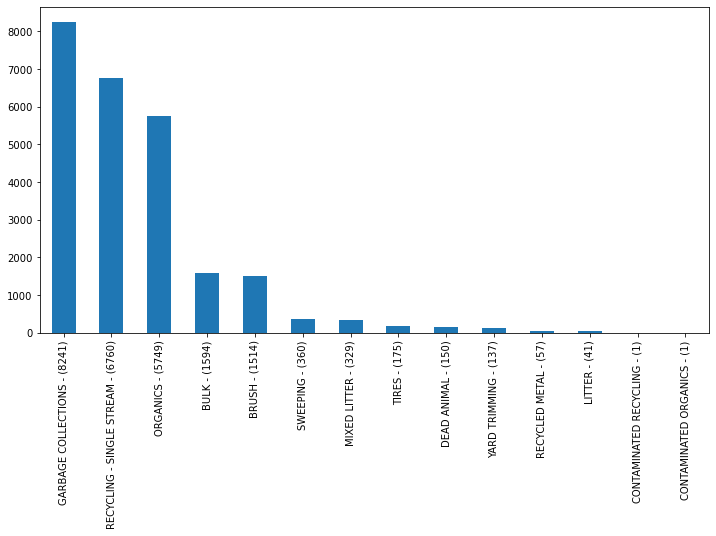

In [150]:
plt.figure(figsize=(12,6))
load_type_counts = df['load_type'].value_counts()
ax1 = load_type_counts.plot(kind='bar');#, logy=True);
labels = []
for i, label in enumerate(load_type_counts.index) :
    labels.append('{} - ({})'.format(label, load_type_counts[label]))
ax1.set_xticklabels(labels);

Daftar situs pengantaran sampah yang berada di kota Austin beserta jumlahnya

In [151]:
df['dropoff_site'].value_counts()

TDS LANDFILL             10691
ORGANICS BY GOSH          5741
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1652
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
Name: dropoff_site, dtype: int64

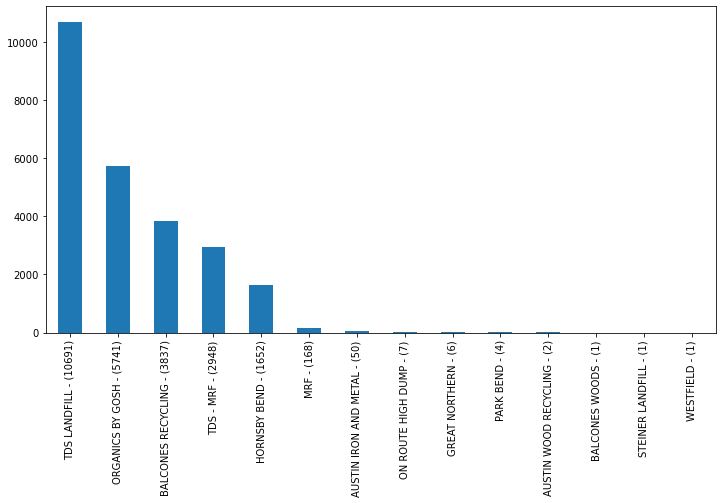

In [152]:
plt.figure(figsize=(12,6))
dropoff_site_counts = df['dropoff_site'].value_counts()
ax1 = dropoff_site_counts.plot(kind='bar');#, logy=True);
labels = []
for i, label in enumerate(dropoff_site_counts.index) :
    labels.append('{} - ({})'.format(label, dropoff_site_counts[label]))
ax1.set_xticklabels(labels);

Rata - rata beban berat sampah di kota Austin mulai tanggal 2 Januari 20211 sampai 9 Juli 2021

In [153]:
df['load_weight'].mean()

12227.136307276274

## 3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site

## Mean berdasarkan dropoff_site dan load_weight

In [154]:
df.groupby('dropoff_site')['load_weight'].mean()

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN           19153.333333
HORNSBY BEND              6628.644068
MRF                       1799.982143
ON ROUTE HIGH DUMP       12525.714286
ORGANICS BY GOSH         11818.482146
PARK BEND                13385.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15169.407215
WESTFIELD                16020.000000
Name: load_weight, dtype: float64

Berdasarkan data di atas
Mean tertinggi terletak di site GREAT NORTHERN sebesar 19153.333333

Mean terendah terletak di site AUSTIN IRON AND METAL sebesar 451.200000

## Median berdasarkan dropoff_site dan load_weight

In [155]:
df.groupby('dropoff_site')['load_weight'].median()

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN           21110.0
HORNSBY BEND              6390.0
MRF                       1360.0
ON ROUTE HIGH DUMP       14940.0
ORGANICS BY GOSH         11920.0
PARK BEND                12330.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
Name: load_weight, dtype: float64

Median tertinggi terletak di site GREAT NORTHERN sebesar 21110.0

Median terendah terletak di site AUSTIN IRON AND METAL sebesar 400.0

## Modus berdasarkan data yang ada yaitu site TDS LANDFILL

In [156]:
df['dropoff_site'].mode()

0    TDS LANDFILL
Name: dropoff_site, dtype: object

In [157]:
df['dropoff_site'].unique()

array(['MRF', 'ORGANICS BY GOSH', 'BALCONES RECYCLING', 'TDS LANDFILL',
       'TDS - MRF', 'HORNSBY BEND', 'AUSTIN IRON AND METAL',
       'GREAT NORTHERN', 'AUSTIN WOOD RECYCLING', 'PARK BEND',
       'ON ROUTE HIGH DUMP', 'BALCONES WOODS', 'STEINER LANDFILL',
       'WESTFIELD'], dtype=object)

In [158]:
load_by_dropoff_site = df.groupby('dropoff_site')['load_type'].unique()
for i in load_by_dropoff_site.index:
    print('\n{}:'.format(i))
    for j in load_by_dropoff_site[i]:
        print('\t{}'.format(j))



AUSTIN IRON AND METAL:
	RECYCLED METAL

AUSTIN WOOD RECYCLING:
	RECYCLING - SINGLE STREAM

BALCONES RECYCLING:
	RECYCLING - SINGLE STREAM

BALCONES WOODS:
	RECYCLING - SINGLE STREAM

GREAT NORTHERN:
	GARBAGE COLLECTIONS

HORNSBY BEND:
	YARD TRIMMING
	BRUSH
	ORGANICS
	GARBAGE COLLECTIONS

MRF:
	TIRES
	BULK
	RECYCLED METAL

ON ROUTE HIGH DUMP:
	ORGANICS

ORGANICS BY GOSH:
	ORGANICS
	DEAD ANIMAL
	RECYCLED METAL
	SWEEPING
	GARBAGE COLLECTIONS

PARK BEND:
	ORGANICS

STEINER LANDFILL:
	GARBAGE COLLECTIONS

TDS - MRF:
	RECYCLING - SINGLE STREAM
	GARBAGE COLLECTIONS
	LITTER
	BULK

TDS LANDFILL:
	GARBAGE COLLECTIONS
	MIXED LITTER
	BULK
	DEAD ANIMAL
	SWEEPING
	LITTER
	TIRES
	ORGANICS
	RECYCLING - SINGLE STREAM
	CONTAMINATED RECYCLING
	CONTAMINATED ORGANICS
	BRUSH
	RECYCLED METAL

WESTFIELD:
	GARBAGE COLLECTIONS


In [159]:
missing =df[df['load_weight'].isnull()]
missing_perc = len(missing) / len(df)*100
print('Missing Total : {}\nMissing Percentage:{:.2f}%'.format(len(missing), missing_perc))

Missing Total : 0
Missing Percentage:0.00%


Melihat dataset sebagai data series berdasarkan load time

In [160]:
data_ts = df.sort_values('load_time')
data_ts.index = data_ts['load_time']
data_ts.drop('load_time', axis = 1 , inplace = True)
data_ts


,report_date,load_type,load_weight,dropoff_site
load_time,,,,
2020-06-27 01:00:00 UTC,2021-05-27,RECYCLING - SINGLE STREAM,5780.0,BALCONES RECYCLING
2020-06-27 01:33:00 UTC,2021-05-27,RECYCLING - SINGLE STREAM,4620.0,BALCONES RECYCLING
2020-06-27 01:45:00 UTC,2021-05-27,RECYCLING - SINGLE STREAM,18180.0,BALCONES RECYCLING
2020-06-27 09:30:00 UTC,2021-05-27,RECYCLING - SINGLE STREAM,4380.0,BALCONES RECYCLING
2020-06-27 12:35:00 UTC,2021-05-27,RECYCLING - SINGLE STREAM,15680.0,BALCONES RECYCLING
...,...,...,...,...
2021-07-09 12:00:00 UTC,2021-07-09,LITTER,3040.0,TDS LANDFILL
2021-07-09 12:02:00 UTC,2021-07-09,BRUSH,4160.0,HORNSBY BEND
2021-07-09 12:39:00 UTC,2021-07-09,BRUSH,7140.0,HORNSBY BEND


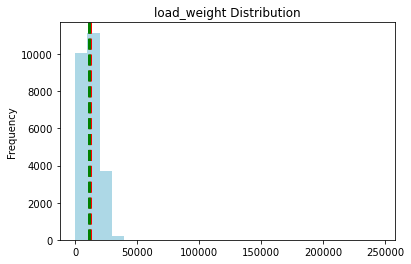

In [161]:
load_weight = df['load_weight']
load_weight.plot.hist(title='load_weight Distribution', color='lightblue', bins=25)
plt.axvline(load_weight.mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(load_weight.median(), color='green', linestyle='dashed', linewidth=3)
plt.show()

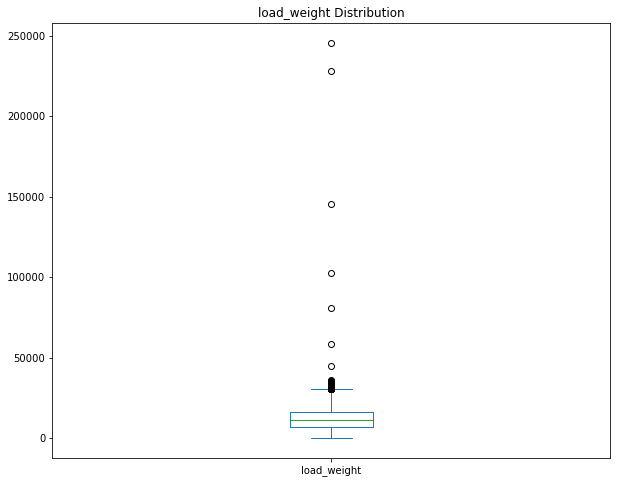

In [162]:
df['load_weight'].plot(kind='box', title='load_weight Distribution', figsize=(10,8))
plt.show()

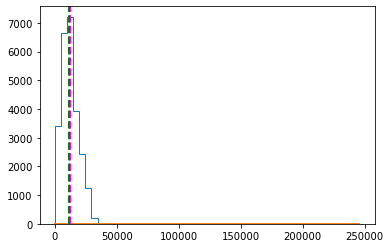

In [163]:
load_weight = df['load_weight']
density = stats.gaussian_kde(load_weight)
n, x, _ = plt.hist(load_weight, histtype='step', bins=50)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(load_weight.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(load_weight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

## 4.Memilih site yang paling menarik perhatian kamu, dan berikan alasannya
Saya tertarik pada site Hornsby Bend karena menurut literasi yang saya baca di sana terdapat Dilo Dirt. Dillo Dirt adalah kompos yang dibuat oleh Kota Austin, Texas sejak tahun 1989. Itu adalah program pertama dari jenisnya di negara bagian dan salah satu yang tertua di negara ini. Dillo Dirt dinamai armadillo sembilan-banded, yang merupakan mamalia asli Texas

In [164]:
df_Hornsby=df[df['dropoff_site'] == 'HORNSBY BEND']
df_Hornsby

,report_date,load_time,load_type,load_weight,dropoff_site
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
12,2021-01-02,2021-01-02 12:04:00 UTC,YARD TRIMMING,18220.0,HORNSBY BEND
13,2021-01-02,2021-01-02 05:45:00 UTC,YARD TRIMMING,7400.0,HORNSBY BEND
14,2021-01-02,2021-01-02 02:05:00 UTC,YARD TRIMMING,17880.0,HORNSBY BEND
15,2021-01-02,2021-01-02 01:02:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...,...
26140,2021-07-09,2021-07-09 02:57:00 UTC,BRUSH,5500.0,HORNSBY BEND
26138,2021-07-09,2021-07-09 05:40:00 UTC,BRUSH,5500.0,HORNSBY BEND
26137,2021-07-09,2021-07-09 06:32:00 UTC,BRUSH,5500.0,HORNSBY BEND
26136,2021-07-09,2021-07-09 10:55:00 UTC,BRUSH,3680.0,HORNSBY BEND


## 5.Mengecek outlier pada data load_weight

In [165]:
df_Hornsby.skew()

C:\Users\fachm\AppData\Local\Temp\ipykernel_15156\1993691029.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Hornsby.skew()


load_weight    0.743034
dtype: float64

Jika kemiringan antara-0,5 dan 0,5, data cukup simetris.

Jika kemiringan antara-1 dan–0,5 atau antara 0,5 dan 1, data cukup miring.

Jika kemiringan kurang dari 1 atau lebih besar, data sangat miring.

skew yang diperoleh pada data load_weight di site Hornsby Bend sebesar 0.743034 sehingga, termasuk kategori data cukup miring.

Langkah selanjutnya adalah menentukan metode untuk mencari outlier terdiri dari 2 metode dengan ketentuan tertentu,yaitu metode :

1. Metode Z score digunakan apabila distribusi data normal yaitu, antara -0,5 dan 0,5.
2. Metode Tukey digunakan apabila distribusi data tidak normal atau data cukup miring.

In [166]:
Q1 = np.quantile(df_Hornsby['load_weight'], .25)
Q3 = np.quantile(df_Hornsby['load_weight'], .75)

IQR = Q3-Q1

print('kuartil 1= ',Q1)
print('kuartil 3= ',Q3)
print('IQR= ',IQR)


kuartil 1=  4615.0
kuartil 3=  8420.0
IQR=  3805.0


In [167]:
#Mencari nilai minimum global dan maksimum global
nilai_min = np.min(df_Hornsby['load_weight'])
nilai_max = np.max(df_Hornsby['load_weight'])
print('Nilai minimum data =' ,nilai_min)
print('Nilai maksimum data =' ,nilai_max)

Nilai minimum data = 60.0
Nilai maksimum data = 20460.0


In [168]:
lower_boundary = Q1 - 1.5*IQR
upper_boundary = Q3 + 1.5*IQR

print(lower_boundary)
print(upper_boundary)

-1092.5
14127.5


In [169]:
df_Hornsby[df_Hornsby['load_weight']<lower_boundary]

,report_date,load_time,load_type,load_weight,dropoff_site


In [170]:
outlier=df_Hornsby[df_Hornsby['load_weight']>upper_boundary]
outlier.head()

,report_date,load_time,load_type,load_weight,dropoff_site
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
12,2021-01-02,2021-01-02 12:04:00 UTC,YARD TRIMMING,18220.0,HORNSBY BEND
14,2021-01-02,2021-01-02 02:05:00 UTC,YARD TRIMMING,17880.0,HORNSBY BEND
15,2021-01-02,2021-01-02 01:02:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
225,2021-01-04,2021-01-04 09:57:00 UTC,YARD TRIMMING,14540.0,HORNSBY BEND


In [171]:
len(outlier)

48

Query untuk kondisi setelah outlier dihilangkan dan kondisi data berada di antara lower boundary dan upper boundary

In [172]:
#query dengan 2 kondisi
df_Hornsby_clean = df_Hornsby[(df_Hornsby['load_weight'] < upper_boundary) & (df_Hornsby['load_weight'] >lower_boundary)]
df_Hornsby_clean

,report_date,load_time,load_type,load_weight,dropoff_site
13,2021-01-02,2021-01-02 05:45:00 UTC,YARD TRIMMING,7400.0,HORNSBY BEND
219,2021-01-04,2021-01-04 12:01:00 UTC,BRUSH,7140.0,HORNSBY BEND
221,2021-01-04,2021-01-04 01:21:00 UTC,BRUSH,7000.0,HORNSBY BEND
222,2021-01-04,2021-01-04 03:16:00 UTC,BRUSH,8160.0,HORNSBY BEND
223,2021-01-04,2021-01-04 08:18:00 UTC,BRUSH,9440.0,HORNSBY BEND
...,...,...,...,...,...
26140,2021-07-09,2021-07-09 02:57:00 UTC,BRUSH,5500.0,HORNSBY BEND
26138,2021-07-09,2021-07-09 05:40:00 UTC,BRUSH,5500.0,HORNSBY BEND
26137,2021-07-09,2021-07-09 06:32:00 UTC,BRUSH,5500.0,HORNSBY BEND
26136,2021-07-09,2021-07-09 10:55:00 UTC,BRUSH,3680.0,HORNSBY BEND


In [173]:
#Jumlah rows sebelum cleaning
len(df_Hornsby)

1652

In [174]:
#Jumlah rows setelah cleaning
len(df_Hornsby_clean)

1604

In [175]:
#Persentase outlier
persentase = (len(outlier) / len(df_Hornsby) )*100
persentase

2.9055690072639226

## Membandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum

Central tendecy sebelum outlier dikeluarkan

In [176]:
# mean 
df_Hornsby.groupby('dropoff_site')['load_weight'].mean()

dropoff_site
HORNSBY BEND    6628.644068
Name: load_weight, dtype: float64

Central tendecy setelah outlier dikeluarkan

In [177]:
# mean
df_Hornsby_clean.groupby('dropoff_site')['load_weight'].mean()

dropoff_site
HORNSBY BEND    6333.229426
Name: load_weight, dtype: float64

Central tendecy sebelum outlier dikeluarkan

In [178]:
# median 
df_Hornsby.groupby('dropoff_site')['load_weight'].median()

dropoff_site
HORNSBY BEND    6390.0
Name: load_weight, dtype: float64

Central tendecy setelah outlier dikeluarkan

In [179]:
# median
df_Hornsby_clean.groupby('dropoff_site')['load_weight'].median()

dropoff_site
HORNSBY BEND    6290.0
Name: load_weight, dtype: float64

Central tendecy sebelum outlier dikeluarkan

In [180]:
# modus
df_Hornsby['load_type'].mode()

0    BRUSH
Name: load_type, dtype: object

Central tendecy setelah outlier dikeluarkan

In [181]:
# modus
df_Hornsby_clean['load_type'].mode()

0    BRUSH
Name: load_type, dtype: object

## 6.Menggunakan site yang telah dipilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. 

In [182]:
# Site yang dipilih
df_Hornsby.groupby('load_type')[['load_weight']].max().sort_values(by='load_weight', ascending=True)

,load_weight
load_type,
GARBAGE COLLECTIONS,8600.0
ORGANICS,9720.0
BRUSH,19660.0
YARD TRIMMING,20460.0


In [183]:
missing_Hornsby =df_Hornsby[df_Hornsby['load_weight'].isnull()]
missing_perc = len(missing_Hornsby) / len(df)*100
print('Missing Total : {}\nMissing Percentage:{:.2f}%'.format(len(missing_Hornsby), missing_perc))

Missing Total : 0
Missing Percentage:0.00%


Menghitung Range

In [184]:
numcols = ['load_weight']
for i in numcols :
    print(df_Hornsby_clean[i].name + 'range: ' + str(df_Hornsby_clean[i].max() - df_Hornsby_clean[i].min()))

load_weightrange: 14060.0


Menghitung Variance

In [185]:
(df_Hornsby_clean['load_weight'].var())

7733348.266731789

Menghitung Standar Deviasi

In [186]:
print(df_Hornsby_clean['load_weight'].std())

2780.889833620129


## 7.Memberikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval

In [187]:
len(df)

25109

In [188]:
df

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
108,2021-01-02,2021-01-02 11:46:00 UTC,ORGANICS,13560.0,ORGANICS BY GOSH
109,2021-01-02,2021-01-02 02:51:00 UTC,ORGANICS,9360.0,ORGANICS BY GOSH
110,2021-01-02,2021-01-04 07:57:00 UTC,ORGANICS,2700.0,ORGANICS BY GOSH
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
...,...,...,...,...,...
26137,2021-07-09,2021-07-09 06:32:00 UTC,BRUSH,5500.0,HORNSBY BEND
26136,2021-07-09,2021-07-09 10:55:00 UTC,BRUSH,3680.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26145,2021-07-09,2021-07-09 10:07:00 UTC,BRUSH,7360.0,HORNSBY BEND


In [189]:
df["load_type"].unique()

array(['TIRES', 'ORGANICS', 'RECYCLING - SINGLE STREAM',
       'GARBAGE COLLECTIONS', 'MIXED LITTER', 'YARD TRIMMING', 'BULK',
       'DEAD ANIMAL', 'SWEEPING', 'BRUSH', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

## Menentukan keputusan site bertambah atau tidak berdasarkan site dengan mean terbanyak

In [190]:
df_mean_terbanyak=df[df['dropoff_site'] == 'GREAT NORTHERN']
df_mean_terbanyak

,report_date,load_time,load_type,load_weight,dropoff_site
4273,2021-02-02,2021-02-02 04:42:00 UTC,GARBAGE COLLECTIONS,21320.0,GREAT NORTHERN
5181,2021-02-09,2021-02-09 01:53:00 UTC,GARBAGE COLLECTIONS,21960.0,GREAT NORTHERN
6198,2021-02-23,2021-02-23 02:02:00 UTC,GARBAGE COLLECTIONS,24880.0,GREAT NORTHERN
6388,2021-02-24,2021-02-24 04:35:00 UTC,GARBAGE COLLECTIONS,8700.0,GREAT NORTHERN
18518,2021-05-12,2021-05-12 12:49:00 UTC,GARBAGE COLLECTIONS,17160.0,GREAT NORTHERN
24396,2021-06-24,2021-06-24 01:22:00 UTC,GARBAGE COLLECTIONS,20900.0,GREAT NORTHERN


In [191]:
df_mean_terbanyak.sum()

C:\Users\fachm\AppData\Local\Temp\ipykernel_15156\3406530474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_terbanyak.sum()


load_time       2021-02-02 04:42:00 UTC2021-02-09 01:53:00 UTC...
load_type       GARBAGE COLLECTIONSGARBAGE COLLECTIONSGARBAGE ...
load_weight                                              114920.0
dropoff_site    GREAT NORTHERNGREAT NORTHERNGREAT NORTHERNGREA...
dtype: object

In [192]:
df_mean_terbanyak['load_weight'].skew()

-1.5090096398210502

nilai skew sebesar -1.5090096398210502 

In [193]:
Q1_mean_terbanyak = np.quantile(df_mean_terbanyak['load_weight'], .25)
Q3_mean_terbanyak = np.quantile(df_mean_terbanyak['load_weight'], .75)

IQR = Q3_mean_terbanyak-Q1_mean_terbanyak

print('kuartil 1= ',Q1_mean_terbanyak)
print('kuartil 3= ',Q3_mean_terbanyak)
print('IQR= ',IQR)

kuartil 1=  18095.0
kuartil 3=  21800.0
IQR=  3705.0


In [194]:
lower_boundary = Q1_mean_terbanyak - 3*IQR
upper_boundary = Q3_mean_terbanyak + 3*IQR

print(lower_boundary)
print(upper_boundary)

6980.0
32915.0


In [195]:
df_mean_terbanyak[df_mean_terbanyak['load_weight']<lower_boundary]

,report_date,load_time,load_type,load_weight,dropoff_site


In [196]:
df_mean_terbanyak[df_mean_terbanyak['load_weight']>upper_boundary]

,report_date,load_time,load_type,load_weight,dropoff_site


In [197]:
#query dengan 2 kondisi
df_mean_terbanyak = df_mean_terbanyak[(df_mean_terbanyak['load_weight'] < upper_boundary) & (df_mean_terbanyak['load_weight'] >lower_boundary)]
df_mean_terbanyak

,report_date,load_time,load_type,load_weight,dropoff_site
4273,2021-02-02,2021-02-02 04:42:00 UTC,GARBAGE COLLECTIONS,21320.0,GREAT NORTHERN
5181,2021-02-09,2021-02-09 01:53:00 UTC,GARBAGE COLLECTIONS,21960.0,GREAT NORTHERN
6198,2021-02-23,2021-02-23 02:02:00 UTC,GARBAGE COLLECTIONS,24880.0,GREAT NORTHERN
6388,2021-02-24,2021-02-24 04:35:00 UTC,GARBAGE COLLECTIONS,8700.0,GREAT NORTHERN
18518,2021-05-12,2021-05-12 12:49:00 UTC,GARBAGE COLLECTIONS,17160.0,GREAT NORTHERN
24396,2021-06-24,2021-06-24 01:22:00 UTC,GARBAGE COLLECTIONS,20900.0,GREAT NORTHERN


In [198]:
# Rata2 load_weight terbanyak dropoff_site
mean_load_weight_terbanyak = df_mean_terbanyak['load_weight'].mean()
mean_load_weight_terbanyak

19153.333333333332

In [199]:
# karena data < 30, kita menggunakan t-test
ci = stats.t.interval(alpha=0.95, df=len(df_mean_terbanyak['load_weight'])-1, loc=df_mean_terbanyak['load_weight'].mean(), scale=df_mean_terbanyak['load_weight'].std())
ci

(4536.555037354798, 33770.11162931187)

In [200]:
# Diantara interval atau tidak ?
ci_mean=ci[0] <= mean_load_weight_terbanyak <= ci[1]
ci_mean

True

Data Confidience Interval(ci) yang diperolah yaitu (4536.555037354798, 33770.11162931187) berdasarkan  mean tertinggi yaitu sebesar 19153.333333333332 yang terletak pada GREAT NORTHERN ,nilai ci tersebut dinyatakan valid sebesar 95%

Kesimpulannya adalah pemerintah perlu menambah site karena site GREAT NORTHERN yang memiliki mean tertinggi dibanding mean site lainnya memiliki data valid sesuai interval dan berpotensi mengalami kenaikan load_weight tiap bulannya. berdasarkan standar deviasi maka kapasitas site baru sekitar kurang lebih 33770

## Menentukan keputusan site bertambah atau tidak berdasarkan site dengan modus terbanyak

In [201]:
df_modus_terbanyak=df[df['dropoff_site'] == 'TDS LANDFILL']
df_modus_terbanyak

,report_date,load_time,load_type,load_weight,dropoff_site
28,2021-01-02,2021-01-02 01:02:00 UTC,GARBAGE COLLECTIONS,8420.0,TDS LANDFILL
29,2021-01-02,2021-01-02 11:13:00 UTC,GARBAGE COLLECTIONS,12380.0,TDS LANDFILL
30,2021-01-02,2021-01-02 12:20:00 UTC,GARBAGE COLLECTIONS,8400.0,TDS LANDFILL
31,2021-01-02,2021-01-02 12:40:00 UTC,GARBAGE COLLECTIONS,19660.0,TDS LANDFILL
32,2021-01-02,2021-01-02 12:00:00 UTC,GARBAGE COLLECTIONS,11940.0,TDS LANDFILL
...,...,...,...,...,...
26057,2021-07-08,2021-07-08 12:40:00 UTC,GARBAGE COLLECTIONS,26460.0,TDS LANDFILL
26058,2021-07-08,2021-07-08 12:33:00 UTC,GARBAGE COLLECTIONS,17840.0,TDS LANDFILL
26053,2021-07-08,2021-07-08 12:47:00 UTC,GARBAGE COLLECTIONS,18320.0,TDS LANDFILL
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [202]:
df_modus_terbanyak.sum()

C:\Users\fachm\AppData\Local\Temp\ipykernel_15156\1746601139.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_modus_terbanyak.sum()


load_time       2021-01-02 01:02:00 UTC2021-01-02 11:13:00 UTC...
load_type       GARBAGE COLLECTIONSGARBAGE COLLECTIONSGARBAGE ...
load_weight                                        162176132.5394
dropoff_site    TDS LANDFILLTDS LANDFILLTDS LANDFILLTDS LANDFI...
dtype: object

In [203]:
modus_load_weight_terbanyak = df_modus_terbanyak['load_weight'].mean()
modus_load_weight_terbanyak


15169.407215358715

In [204]:
ci_modus_terbanyak = stats.norm.interval(0.95, df_modus_terbanyak['load_weight'].mean(), df_modus_terbanyak['load_weight'].std())
ci_modus_terbanyak

(-1668.7007690319188, 32007.51519974935)

In [205]:
# Diantara interval atau tidak ?
ci_modus=ci[0] <= modus_load_weight_terbanyak <= ci[1]
ci_modus

True

Data Confidience Interval(ci) yang diperolah yaitu (-1668.7007690319188, 32007.51519974935) berdasarkan  modus tertinggi yaitu di site TDS LANDFILLTDS dengan mean sebesar 15169.407215358715 dengan banyak data(n) 10691,nilai ci tersebut dinyatakan valid sebesar 95%

Kesimpulannya adalah pemerintah perlu menambah site karena site TDS LANDFILLTDS yang memiliki modus tertinggi karena memiliki data valid sesuai dan berpotensi mengalami kenaikan load_weight tiap bulannya. Kapasitas yang diperlukan sekitar 32007

## 8.Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia

<AxesSubplot:ylabel='load_weight'>

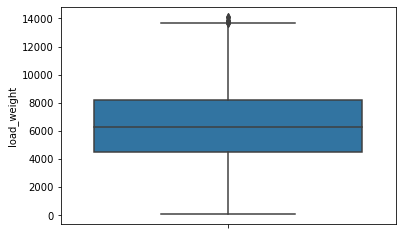

In [206]:
sns.boxplot(data=df_Hornsby_clean, y= 'load_weight')

In [207]:
df_Hornsby_clean[df_Hornsby_clean['load_weight']>15000]

,report_date,load_time,load_type,load_weight,dropoff_site


In [208]:
#median
df_Hornsby_clean.groupby('dropoff_site')['load_weight'].median()

dropoff_site
HORNSBY BEND    6290.0
Name: load_weight, dtype: float64

In [209]:
# mean
df_Hornsby_clean.groupby('dropoff_site')['load_weight'].mean()

dropoff_site
HORNSBY BEND    6333.229426
Name: load_weight, dtype: float64

1. Apakah rata - rata 'load_weight' di site Hornsby Bend berbeda signifikan dengan nilai 6290?

load weigh di Hornsby Bend memiliki rata-rata load weight sebesar 6333 berdasarkan data tersebut dapat dibuat hipotesis berupa:

- H0 = Rata-rata load weight  =  6290.0
- H1 = Rata-rata load weight !=  6290.0

In [218]:
#ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(df_Hornsby_clean['load_weight'], 6290)
print('P-value: ', p_val)
print('t-statistics: ', t_stat)

P-value:  0.5336465592750176
t-statistics:  0.622583878912927


<Figure size 1152x360 with 0 Axes>

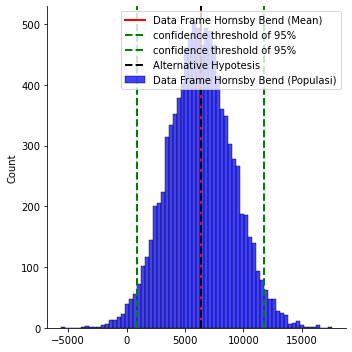

In [211]:
#simulasi

pop = np.random.normal(df_Hornsby_clean['load_weight'].mean(), df_Hornsby_clean['load_weight'].std(), 10000 )
# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, df_Hornsby_clean['load_weight'].mean(), df_Hornsby_clean['load_weight'].std())

plt.figure(figsize=(16,5))
#memvisualisasikan simulasi pdf
sns.displot(pop, label= "Data Frame Hornsby Bend (Populasi)", color='blue')
plt.axvline(df_Hornsby_clean['load_weight'].mean(), color='red', linewidth=2, label= "Data Frame Hornsby Bend (Mean)")

#membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label= 'confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label= 'confidence threshold of 95%')

#membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypotesis')
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

P-value: 0.5336465592750176

alpha  : 0.05

H0 gagal ditolak karena P-value > alpha, sehingga keputusannya adalah kesimpulan yang sesuai dengan keadaan saat penelitian ini adalah yang tertulis di H0 yaitu rata-rata load weight sama dengan 6290


Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

1. Teknik yang saya pilih adalah teknik trimming. Tujuannya adalah untuk mengeliminasi data yang berada di bawah lower boundary dan di atas upper boundary

2. konsepnya adalah menggunakan 2 parameter untuk mengukur keakuratan sebuah sample mean terhadap populasi mean. Rentang nilai yg berada untuk suatu sample mean di mana kemungkinan population mean masuk dalam rentang sebesar 95%. jadi, misalnya terdapat 100 samples data maka peluang kemungkinan  95 sample mencakup nilai populatioon mean. CI yang diperoleh pada soal nomor 7 menjadi acuan untuk kapasitas yang diperlukan untuk site baru berdasarkan site mean terbanyak adalah sebesar kurang lebih 33770 dan berdasarkan site sesuai modus adalah kurang lebih 32007 

3. Jenis uji hipotesis yang digunakan adalah T-test 1 sample 2 Tailed karena sampel yang diuji hanya 1 sample dan 2-tailed digunakan untuk menguji hipotesis yang tidak terarah. pada peneliitian ini hanya menguji 1 sampel dan membandingkan rata rata dari sampel tersebut

## Problem 2 (Math/Calculus)

In [212]:
forecasting=df.groupby("report_date").sum()
forecasting

,load_weight
report_date,
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
2021-01-07,2438330.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


In [213]:
df_test = df.groupby("report_date")['load_weight'].sum()
df_test["diff"] = df_test.diff()

In [214]:
v = np.diff(forecasting["load_weight"])/np.diff(range(165))
v

array([ 7.50130000e+05, -5.31720000e+05,  8.01000000e+03,  4.17800000e+04,
       -5.93380000e+05, -1.81681000e+06,  2.46847000e+06, -4.22690000e+05,
       -5.34000000e+03, -3.57300000e+04, -3.15860000e+05, -1.68213000e+06,
        2.40679000e+06, -2.67390000e+05, -7.91300000e+04, -2.97600000e+04,
       -2.86770000e+05, -1.59572000e+06,  2.31477000e+06, -4.40200000e+05,
        3.03900000e+04,  3.62200000e+04, -3.88890000e+05, -1.73503000e+06,
        2.43934000e+06, -3.60620000e+05, -8.69800000e+04,  1.16700000e+05,
       -3.72670000e+05, -1.73345000e+06,  1.17200000e+04,  2.60815000e+06,
       -4.94950000e+05, -3.38800000e+04, -1.31158000e+06,  1.08996000e+06,
       -1.83900000e+06,  1.05132000e+06,  2.66098000e+06, -5.04400000e+05,
        7.47900000e+04,  6.37300000e+04, -9.73200000e+05, -2.16812000e+06,
        1.59200000e+04,  2.95084000e+06, -2.95220000e+05, -1.06440000e+05,
       -3.87200000e+04, -3.54825000e+05, -2.17421500e+06, -5.08200000e+04,
        3.08313000e+06, -

In [215]:
df_test["diff"].diff()

report_date
2021-01-02          NaN
2021-01-04          NaN
2021-01-05   -1281850.0
2021-01-06     539730.0
2021-01-07      33770.0
                ...    
2021-07-05    3107530.0
2021-07-06   -1664700.0
2021-07-07    -392910.0
2021-07-08     233130.0
2021-07-09   -1161880.0
Name: load_weight, Length: 165, dtype: float64

In [216]:
df.groupby("report_date").sum().diff()

,load_weight
report_date,
2021-01-02,NaN
2021-01-04,750130.0
2021-01-05,-531720.0
2021-01-06,8010.0
2021-01-07,41780.0
...,...
2021-07-05,1689050.0
2021-07-06,24350.0
2021-07-07,-368560.0


In [217]:
Weight_Tomorrow = forecasting["load_weight"][-1] + v[-1] * 1
abs(Weight_Tomorrow)

1176970.0

Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
3. berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

1. saya menggunakan numerical, .diff()

2. iya, saya membutuhkan fungsi .diff() untuk mencari selisih load weight 

3. v = w1 - w0 / (t1 - t0)
   v = 120340.0 - 1417650.0 / 1
   v = -1297310

   w tgl 10 = w tgl 9 + (v * 1)
   w tgl 10 = 120340 +  (-1297310)
   w tgl 10 = 1176970
   

## Conclusions, Assumptions, Overall Analysis
 Berdasarkan data yang tersedia, pemerintah sebaiknya perlu mempertimbangkan untuk menambah site baru karena site dengan modus dan mean tertinggi terindikasi mengalami overload berdasarkan pola load weight tiap bulan sehingga untuk mengantisipasi keadaan tersebut perlu ditambah site baru.
 